In [ ]:
# # python3 /home/rnb/Projects/rnb-planning/src/pkg/planning/filtering/lattice_model/shared_lattice_predictor.py --rtype panda

# import SharedArray as sa
# ROBOT_TYPE_NAME = 'panda'
# sa.delete("shm://{}.prepared".format(ROBOT_TYPE_NAME))
# sa.delete("shm://{}.grasp_img".format(ROBOT_TYPE_NAME))
# sa.delete("shm://{}.arm_img".format(ROBOT_TYPE_NAME))
# sa.delete("shm://{}.rh_vals".format(ROBOT_TYPE_NAME))
# sa.delete("shm://{}.result".format(ROBOT_TYPE_NAME))
# sa.delete("shm://{}.query_in".format(ROBOT_TYPE_NAME))
# sa.delete("shm://{}.response_out".format(ROBOT_TYPE_NAME))
# sa.delete("shm://{}.query_quit".format(ROBOT_TYPE_NAME))

In [1]:
from __future__ import print_function
import os
import sys
RNB_PLANNING_DIR = os.environ["RNB_PLANNING_DIR"]
sys.path.append(os.path.join(RNB_PLANNING_DIR, 'src'))
from pkg.controller.combined_robot import *
from pkg.utils.utils import get_now, try_mkdir
import subprocess

DATA_PATH = os.path.join(RNB_PLANNING_DIR, "data")
try_mkdir(DATA_PATH)

DAT_ROOT = "stowing-deep"
TEST_DATA_PATH = os.path.join(DATA_PATH, DAT_ROOT)
try_mkdir(TEST_DATA_PATH)

IK_NUMS = [1,2,4,8, 16,32,64]
RESULT_PATHS = []
IK_DIR_FORM = "stowing-deep-result-analysis-ik{:03}-mp2fix"
for ik_num in IK_NUMS:
    RES_ROOT = IK_DIR_FORM.format(ik_num)
    TEST_RESULT_PATH = os.path.join(DATA_PATH, RES_ROOT)
    try_mkdir(TEST_RESULT_PATH)
    RESULT_PATHS.append(RES_ROOT)

HEADS = ["plan_time", "length", "MP_count", "failed_MPs", "IK_count", "failed_IKs", "success"]

def run_test_loop(FILE_OPTION, I_START, I_END, common_args, CNAME_LIST=['None', 'Tool', 'ToolReach', 'Full']):
    N_DAT = I_END-I_START
    ROBOT_DATA_ROOT = os.path.join(TEST_DATA_PATH, RTYPE)
    DATASET_PATH = os.path.join(ROBOT_DATA_ROOT, DAT_DIR)
    file_list = sorted(os.listdir(DATASET_PATH))

    gtimer = GlobalTimer.instance()
    gtimer.reset(scale=1, timeunit='s')

    gtimer.tic("full_loop")
    for fid in range(I_START, I_END):
        e_step_list = []
        for i_c, cname in enumerate(CNAME_LIST):
            gtimer.tic("step")
            p = subprocess.Popen(['python', '{}src/scripts/developing/pddlstream/test_saved_scene.py'.format(RNB_PLANNING_DIR),
                                  '--data_idx', str(fid), '--file_option', FILE_OPTION, '--cname', cname,]
                                 + common_args)
            p.wait()
            e_step = np.round(gtimer.toc("step"), 1)
            e_step_list.append(e_step)
            print("------- " + ("{:<8}"*len(e_step_list)).format(*e_step_list) + "-------", end="\r")

        print("")
        print("========== {} / {} (eta: {} / {} s) =========".format(
            fid+1, N_DAT, *np.round(gtimer.eta("full_loop", fid-I_START+1, N_DAT), 1)))

## Common params

In [2]:
RTYPE = "panda"
DAT_DIR = '20210917-113211'
I_START = 0
I_END = 50


CNAME_LIST = ['None', 'Full']
# CNAME_LIST = ['Full'] #,'Pairwise']
VISUALIZE = False
PLAY_RESULT = False
SHOW_STATE = False

TIMEOUT_MOTION = 2
MAX_TIME = 100
MAX_ITER = 100

GRASP_SAMPLE = 30
STABLE_SAMPLE = 50
SEARCH_SAMPLE_RATIO= 100
MAX_SKELETONS = 30
TIMED_COMPLETE = False
STACK_TIMELOG = True
IK_TRY_NUM = 30
VERBOSE = False
USE_MOVEIT_IK = True


common_args = [
            '--rtype', RTYPE,
            '--dat_root', DAT_ROOT,
            '--res_root', RES_ROOT,
            '--dat_dir', DAT_DIR,
            '--VISUALIZE', str(VISUALIZE),
            '--PLAY_RESULT', str(PLAY_RESULT),
            '--TIMEOUT_MOTION', str(TIMEOUT_MOTION),
            '--MAX_TIME', str(MAX_TIME),
            '--MAX_ITER', str(MAX_ITER), 
            '--GRASP_SAMPLE', str(GRASP_SAMPLE),
            '--STABLE_SAMPLE', str(STABLE_SAMPLE),
            '--SEARCH_SAMPLE_RATIO', str(SEARCH_SAMPLE_RATIO),
            '--MAX_SKELETONS', str(MAX_SKELETONS),
            '--TIMED_COMPLETE', str(TIMED_COMPLETE),
            '--STACK_TIMELOG', str(STACK_TIMELOG),
            '--IK_TRY_NUM', str(IK_TRY_NUM),
            '--VERBOSE', str(VERBOSE),
            '--USE_MOVEIT_IK', str(USE_MOVEIT_IK)]

# test loop

In [ ]:
for ik_num, res_path in zip(IK_NUMS, RESULT_PATHS):
    common_args[common_args.index("--res_root")+1] = res_path
    common_args[common_args.index("--IK_TRY_NUM")+1] = str(ik_num)
    FILE_OPTION = "obj_1c_obs0"
    run_test_loop(FILE_OPTION, I_START, I_END, common_args, CNAME_LIST=CNAME_LIST)

    FILE_OPTION = "obj_1c_obs3"
    run_test_loop(FILE_OPTION, I_START, I_END, common_args, CNAME_LIST=CNAME_LIST)

    FILE_OPTION = "obj_1c_obs5"
    run_test_loop(FILE_OPTION, I_START, I_END, common_args, CNAME_LIST=CNAME_LIST)

    FILE_OPTION = "obj_1c_obs7"
    run_test_loop(FILE_OPTION, I_START, I_END, common_args, CNAME_LIST=CNAME_LIST)

    FILE_OPTION = "obj_3c_obs3"
    run_test_loop(FILE_OPTION, I_START, I_END, common_args, CNAME_LIST=CNAME_LIST)

    FILE_OPTION = "obj_3c_obs5"
    run_test_loop(FILE_OPTION, I_START, I_END, common_args, CNAME_LIST=CNAME_LIST)

    FILE_OPTION = "obj_3c_obs7"
    run_test_loop(FILE_OPTION, I_START, I_END, common_args, CNAME_LIST=CNAME_LIST)

------- 6.8     -------
========== 1 / 50 (eta: 6.8 / 340.4 s) =========
------- 7.7     -------
========== 2 / 50 (eta: 14.6 / 363.8 s) =========
------- 9.5     -------
========== 3 / 50 (eta: 24.1 / 401.1 s) =========
------- 11.5    -------
========== 4 / 50 (eta: 35.6 / 444.8 s) =========
------- 6.4     -------
========== 5 / 50 (eta: 42.0 / 419.8 s) =========
------- 11.2    -------
========== 6 / 50 (eta: 53.2 / 443.4 s) =========
------- 9.7     -------
========== 7 / 50 (eta: 62.9 / 449.4 s) =========
------- 5.1     -------
========== 8 / 50 (eta: 68.0 / 425.3 s) =========
------- 5.2     -------
========== 9 / 50 (eta: 73.3 / 407.1 s) =========
------- 5.3     -------
========== 10 / 50 (eta: 78.6 / 393.1 s) =========
------- 5.3     -------
========== 11 / 50 (eta: 83.9 / 381.5 s) =========
------- 8.4     -------
========== 12 / 50 (eta: 92.3 / 384.7 s) =========
------- 5.7     -------
========== 13 / 50 (eta: 98.0 / 377.0 s) =========
------- 10.6    -------
========== 

------- 5.3     -------
========== 10 / 50 (eta: 89.5 / 447.4 s) =========
------- 5.5     -------
========== 11 / 50 (eta: 95.0 / 431.8 s) =========
------- 10.2    -------
========== 12 / 50 (eta: 105.2 / 438.3 s) =========
------- 7.7     -------
========== 13 / 50 (eta: 112.9 / 434.3 s) =========
------- 5.5     -------
========== 14 / 50 (eta: 118.4 / 422.9 s) =========
------- 7.5     -------
========== 15 / 50 (eta: 126.0 / 419.9 s) =========
------- 7.5     -------
========== 16 / 50 (eta: 133.5 / 417.1 s) =========
------- 5.6     -------
========== 17 / 50 (eta: 139.1 / 409.0 s) =========
------- 17.0    -------
========== 18 / 50 (eta: 156.1 / 433.6 s) =========
------- 12.3    -------
========== 19 / 50 (eta: 168.4 / 443.2 s) =========
------- 7.3     -------
========== 20 / 50 (eta: 175.7 / 439.3 s) =========
------- 9.9     -------
========== 21 / 50 (eta: 185.6 / 442.0 s) =========
------- 8.3     -------
========== 22 / 50 (eta: 194.0 / 440.9 s) =========
------- 5.8   

------- 6.4     -------
========== 19 / 50 (eta: 286.1 / 753.0 s) =========
------- 7.6     -------
========== 20 / 50 (eta: 293.7 / 734.3 s) =========
------- 6.4     -------
========== 21 / 50 (eta: 300.2 / 714.7 s) =========
------- 9.7     -------
========== 22 / 50 (eta: 309.9 / 704.2 s) =========
------- 5.8     -------
========== 23 / 50 (eta: 315.7 / 686.3 s) =========
------- 5.6     -------
========== 24 / 50 (eta: 321.3 / 669.4 s) =========
------- 108.9   -------
========== 25 / 50 (eta: 430.2 / 860.4 s) =========
------- 18.5    -------
========== 26 / 50 (eta: 448.7 / 862.9 s) =========
------- 5.5     -------
========== 27 / 50 (eta: 454.3 / 841.2 s) =========
------- 11.3    -------
========== 28 / 50 (eta: 465.6 / 831.4 s) =========
------- 5.3     -------
========== 29 / 50 (eta: 470.9 / 811.9 s) =========
------- 5.6     -------
========== 30 / 50 (eta: 476.5 / 794.2 s) =========
------- 9.6     -------
========== 31 / 50 (eta: 486.1 / 784.1 s) =========
------- 8.1 

------- 8.6     -------
========== 27 / 50 (eta: 1084.0 / 2007.5 s) =========
------- 6.4     -------
========== 28 / 50 (eta: 1090.4 / 1947.2 s) =========
------- 114.8   -------
========== 29 / 50 (eta: 1205.3 / 2078.0 s) =========
------- 6.3     -------
========== 30 / 50 (eta: 1211.6 / 2019.3 s) =========
------- 5.8     -------
========== 31 / 50 (eta: 1217.4 / 1963.5 s) =========
------- 23.5    -------
========== 32 / 50 (eta: 1240.9 / 1938.8 s) =========
------- 8.9     -------
========== 33 / 50 (eta: 1249.8 / 1893.6 s) =========
------- 7.9     -------
========== 34 / 50 (eta: 1257.7 / 1849.6 s) =========
------- 8.3     -------
========== 35 / 50 (eta: 1266.0 / 1808.6 s) =========
------- 6.4     -------
========== 36 / 50 (eta: 1272.5 / 1767.3 s) =========
------- 5.7     -------
========== 37 / 50 (eta: 1278.2 / 1727.3 s) =========
------- 5.8     -------
========== 38 / 50 (eta: 1284.0 / 1689.5 s) =========
------- 105.3   -------
========== 39 / 50 (eta: 1389.3 / 1781.2

------- 7.8     -------
========== 35 / 50 (eta: 383.3 / 547.6 s) =========
------- 5.8     -------
========== 36 / 50 (eta: 389.1 / 540.5 s) =========
------- 7.5     -------
========== 37 / 50 (eta: 396.7 / 536.0 s) =========
------- 8.2     -------
========== 38 / 50 (eta: 404.9 / 532.7 s) =========
------- 6.7     -------
========== 39 / 50 (eta: 411.6 / 527.7 s) =========
------- 5.6     -------
========== 40 / 50 (eta: 417.2 / 521.5 s) =========
------- 5.7     -------
========== 41 / 50 (eta: 422.9 / 515.7 s) =========
------- 5.6     -------
========== 42 / 50 (eta: 428.5 / 510.1 s) =========
------- 7.7     -------
========== 43 / 50 (eta: 436.2 / 507.2 s) =========
------- 13.0    -------
========== 44 / 50 (eta: 449.2 / 510.5 s) =========
------- 5.8     -------
========== 45 / 50 (eta: 455.0 / 505.6 s) =========
------- 5.5     -------
========== 46 / 50 (eta: 460.5 / 500.6 s) =========
------- 9.8     -------
========== 47 / 50 (eta: 470.3 / 500.4 s) =========
------- 5.3 

------- 6.1     -------
========== 44 / 50 (eta: 417.5 / 474.4 s) =========
------- 7.5     -------
========== 45 / 50 (eta: 425.0 / 472.3 s) =========
------- 5.5     -------
========== 46 / 50 (eta: 430.5 / 468.0 s) =========
------- 7.7     -------
========== 47 / 50 (eta: 438.2 / 466.2 s) =========
------- 12.3    -------
========== 48 / 50 (eta: 450.5 / 469.3 s) =========
------- 21.0    -------
========== 49 / 50 (eta: 471.6 / 481.2 s) =========
------- 5.9     -------
========== 50 / 50 (eta: 477.5 / 477.5 s) =========
------- 58.4    -------
========== 1 / 50 (eta: 58.4 / 2918.7 s) =========
------- 12.9    -------
========== 2 / 50 (eta: 71.3 / 1781.8 s) =========
------- 8.1     -------
========== 3 / 50 (eta: 79.4 / 1323.0 s) =========
------- 7.7     -------
========== 4 / 50 (eta: 87.1 / 1088.9 s) =========
------- 5.8     -------
========== 5 / 50 (eta: 93.0 / 929.5 s) =========
------- 5.9     -------
========== 6 / 50 (eta: 98.9 / 823.9 s) =========
------- 108.6   ----

------- 6.4     -------
========== 2 / 50 (eta: 116.6 / 2915.4 s) =========
------- 7.7     -------
========== 3 / 50 (eta: 124.3 / 2072.3 s) =========
------- 7.7     -------
========== 4 / 50 (eta: 132.1 / 1650.6 s) =========
------- 6.3     -------
========== 5 / 50 (eta: 138.4 / 1383.5 s) =========
------- 9.0     -------
========== 6 / 50 (eta: 147.3 / 1227.6 s) =========
------- 105.8   -------
========== 7 / 50 (eta: 253.1 / 1808.1 s) =========
------- 5.8     -------
========== 8 / 50 (eta: 258.9 / 1618.3 s) =========
------- 10.8    -------
========== 9 / 50 (eta: 269.8 / 1498.6 s) =========
------- 8.3     -------
========== 10 / 50 (eta: 278.1 / 1390.5 s) =========
------- 5.5     -------
========== 11 / 50 (eta: 283.6 / 1289.1 s) =========
------- 107.5   -------
========== 12 / 50 (eta: 391.1 / 1629.6 s) =========
------- 107.9   -------
========== 13 / 50 (eta: 499.0 / 1919.3 s) =========
------- 21.9    -------
========== 14 / 50 (eta: 520.9 / 1860.5 s) =========
-------

------- 5.7     -------
========== 10 / 50 (eta: 71.8 / 359.1 s) =========
------- 6.2     -------
========== 11 / 50 (eta: 78.0 / 354.7 s) =========
------- 6.7     -------
========== 12 / 50 (eta: 84.7 / 353.0 s) =========
------- 8.2     -------
========== 13 / 50 (eta: 92.9 / 357.5 s) =========
------- 5.7     -------
========== 14 / 50 (eta: 98.6 / 352.3 s) =========
------- 10.0    -------
========== 15 / 50 (eta: 108.6 / 362.1 s) =========
------- 6.0     -------
========== 16 / 50 (eta: 114.7 / 358.3 s) =========
------- 6.6     -------
========== 17 / 50 (eta: 121.3 / 356.7 s) =========
------- 5.8     -------
========== 18 / 50 (eta: 127.1 / 353.0 s) =========
------- 12.3    -------
========== 19 / 50 (eta: 139.4 / 366.8 s) =========
------- 55.4    -------
========== 20 / 50 (eta: 194.8 / 487.0 s) =========
------- 18.8    -------
========== 21 / 50 (eta: 213.6 / 508.6 s) =========
------- 17.3    -------
========== 22 / 50 (eta: 230.9 / 524.9 s) =========
------- 7.7     -

------- 7.8     -------
========== 19 / 50 (eta: 153.9 / 405.1 s) =========
------- 7.0     -------
========== 20 / 50 (eta: 160.9 / 402.4 s) =========
------- 8.5     -------
========== 21 / 50 (eta: 169.4 / 403.3 s) =========
------- 10.6    -------
========== 22 / 50 (eta: 180.0 / 409.1 s) =========
------- 10.2    -------
========== 23 / 50 (eta: 190.2 / 413.5 s) =========
------- 10.7    -------
========== 24 / 50 (eta: 200.9 / 418.6 s) =========
------- 7.5     -------
========== 25 / 50 (eta: 208.4 / 416.9 s) =========
------- 42.2    -------
========== 26 / 50 (eta: 250.7 / 482.1 s) =========
------- 6.1     -------
========== 27 / 50 (eta: 256.8 / 475.6 s) =========
------- 6.0     -------
========== 28 / 50 (eta: 262.8 / 469.3 s) =========
------- 18.8    -------
========== 29 / 50 (eta: 281.6 / 485.6 s) =========
------- 7.9     -------
========== 30 / 50 (eta: 289.5 / 482.5 s) =========
------- 7.7     -------
========== 31 / 50 (eta: 297.2 / 479.4 s) =========
------- 12.2

------- 11.3    -------
========== 27 / 50 (eta: 561.8 / 1040.4 s) =========
------- 5.8     -------
========== 28 / 50 (eta: 567.6 / 1013.6 s) =========
------- 5.8     -------
========== 29 / 50 (eta: 573.4 / 988.6 s) =========
------- 112.1   -------
========== 30 / 50 (eta: 685.5 / 1142.5 s) =========
------- 32.4    -------
========== 31 / 50 (eta: 717.9 / 1157.9 s) =========
------- 12.0    -------
========== 32 / 50 (eta: 729.9 / 1140.4 s) =========
------- 7.6     -------
========== 33 / 50 (eta: 737.5 / 1117.4 s) =========
------- 20.9    -------
========== 34 / 50 (eta: 758.4 / 1115.3 s) =========
------- 11.0    -------
========== 35 / 50 (eta: 769.5 / 1099.2 s) =========
------- 9.2     -------
========== 36 / 50 (eta: 778.7 / 1081.5 s) =========
------- 11.1    -------
========== 37 / 50 (eta: 789.8 / 1067.3 s) =========
------- 106.6   -------
========== 38 / 50 (eta: 896.4 / 1179.5 s) =========
------- 13.9    -------
========== 39 / 50 (eta: 910.3 / 1167.1 s) =========


------- 10.0    -------
========== 35 / 50 (eta: 285.9 / 408.5 s) =========
------- 7.9     -------
========== 36 / 50 (eta: 293.9 / 408.1 s) =========
------- 7.5     -------
========== 37 / 50 (eta: 301.4 / 407.3 s) =========
------- 9.7     -------
========== 38 / 50 (eta: 311.1 / 409.3 s) =========
------- 6.3     -------
========== 39 / 50 (eta: 317.4 / 406.9 s) =========
------- 6.3     -------
========== 40 / 50 (eta: 323.7 / 404.7 s) =========
------- 10.7    -------
========== 41 / 50 (eta: 334.5 / 407.9 s) =========
------- 9.3     -------
========== 42 / 50 (eta: 343.8 / 409.3 s) =========
------- 6.0     -------
========== 43 / 50 (eta: 349.9 / 406.8 s) =========
------- 8.9     -------
========== 44 / 50 (eta: 358.8 / 407.7 s) =========
------- 8.6     -------
========== 45 / 50 (eta: 367.4 / 408.2 s) =========
------- 5.9     -------
========== 46 / 50 (eta: 373.3 / 405.8 s) =========
------- 8.4     -------
========== 47 / 50 (eta: 381.7 / 406.1 s) =========
------- 5.6 

------- 9.0     -------
========== 44 / 50 (eta: 519.6 / 590.5 s) =========
------- 5.7     -------
========== 45 / 50 (eta: 525.4 / 583.7 s) =========
------- 6.1     -------
========== 46 / 50 (eta: 531.5 / 577.7 s) =========
------- 9.5     -------
========== 47 / 50 (eta: 541.0 / 575.5 s) =========
------- 12.1    -------
========== 48 / 50 (eta: 553.1 / 576.1 s) =========
------- 9.1     -------
========== 49 / 50 (eta: 562.2 / 573.7 s) =========
------- 7.8     -------
========== 50 / 50 (eta: 570.0 / 570.0 s) =========
------- 6.1     -------
========== 1 / 50 (eta: 6.1 / 305.7 s) =========
------- 5.7     -------
========== 2 / 50 (eta: 11.8 / 295.5 s) =========
------- 6.4     -------
========== 3 / 50 (eta: 18.2 / 304.1 s) =========
------- 5.6     -------
========== 4 / 50 (eta: 23.8 / 298.1 s) =========
------- 18.2    -------
========== 5 / 50 (eta: 42.1 / 420.9 s) =========
------- 12.9    -------
========== 6 / 50 (eta: 55.0 / 458.4 s) =========
------- 7.6     -------
=

------- 7.0     -------
========== 3 / 50 (eta: 22.2 / 369.6 s) =========
------- 6.6     -------
========== 4 / 50 (eta: 28.8 / 360.1 s) =========
------- 12.6    -------
========== 5 / 50 (eta: 41.4 / 414.3 s) =========
------- 8.6     -------
========== 6 / 50 (eta: 50.0 / 416.9 s) =========
------- 8.3     -------
========== 7 / 50 (eta: 58.4 / 416.9 s) =========
------- 11.0    -------
========== 8 / 50 (eta: 69.4 / 433.8 s) =========
------- 6.7     -------
========== 9 / 50 (eta: 76.1 / 422.8 s) =========
------- 8.3     -------
========== 10 / 50 (eta: 84.4 / 422.1 s) =========
------- 26.8    -------
========== 11 / 50 (eta: 111.3 / 505.7 s) =========
------- 106.6   -------
========== 12 / 50 (eta: 217.9 / 907.8 s) =========
------- 9.8     -------
========== 13 / 50 (eta: 227.7 / 875.7 s) =========
------- 8.0     -------
========== 14 / 50 (eta: 235.7 / 841.8 s) =========
------- 29.3    -------
========== 15 / 50 (eta: 265.0 / 883.4 s) =========
------- 7.2     -------
===

------- 7.7     -------
========== 11 / 50 (eta: 97.1 / 441.5 s) =========
------- 7.2     -------
========== 12 / 50 (eta: 104.4 / 434.8 s) =========
------- 7.2     -------
========== 13 / 50 (eta: 111.6 / 429.1 s) =========
------- 13.7    -------
========== 14 / 50 (eta: 125.3 / 447.4 s) =========
------- 6.3     -------
========== 15 / 50 (eta: 131.6 / 438.6 s) =========
------- 6.0     -------
========== 16 / 50 (eta: 137.6 / 430.0 s) =========
------- 6.2     -------
========== 17 / 50 (eta: 143.8 / 422.9 s) =========
------- 7.9     -------
========== 18 / 50 (eta: 151.7 / 421.3 s) =========
------- 7.9     -------
========== 19 / 50 (eta: 159.6 / 420.0 s) =========
------- 5.5     -------
========== 20 / 50 (eta: 165.1 / 412.8 s) =========
------- 7.0     -------
========== 21 / 50 (eta: 172.1 / 409.8 s) =========
------- 7.6     -------
========== 22 / 50 (eta: 179.7 / 408.4 s) =========
------- 6.1     -------
========== 23 / 50 (eta: 185.8 / 404.0 s) =========
------- 5.9  

------- 6.1     -------
========== 20 / 50 (eta: 355.9 / 889.8 s) =========
------- 30.4    -------
========== 21 / 50 (eta: 386.4 / 919.9 s) =========
------- 13.3    -------
========== 22 / 50 (eta: 399.7 / 908.3 s) =========
------- 6.1     -------
========== 23 / 50 (eta: 405.8 / 882.2 s) =========
------- 10.1    -------
========== 24 / 50 (eta: 415.9 / 866.4 s) =========
------- 15.8    -------
========== 25 / 50 (eta: 431.7 / 863.4 s) =========
------- 35.1    -------
========== 26 / 50 (eta: 466.8 / 897.8 s) =========
------- 13.6    -------
========== 27 / 50 (eta: 480.5 / 889.8 s) =========
------- 19.9    -------
========== 28 / 50 (eta: 500.4 / 893.6 s) =========
------- 5.9     -------
========== 29 / 50 (eta: 506.3 / 873.0 s) =========
------- 5.9     -------
========== 30 / 50 (eta: 512.2 / 853.7 s) =========
------- 6.2     -------
========== 31 / 50 (eta: 518.5 / 836.3 s) =========
------- 5.9     -------
========== 32 / 50 (eta: 524.4 / 819.4 s) =========
------- 6.4 

------- 10.7    -------
========== 28 / 50 (eta: 567.3 / 1013.1 s) =========
------- 9.0     -------
========== 29 / 50 (eta: 576.4 / 993.7 s) =========
------- 7.2     -------
========== 30 / 50 (eta: 583.6 / 972.7 s) =========
------- 6.9     -------
========== 31 / 50 (eta: 590.5 / 952.4 s) =========
------- 9.5     -------
========== 32 / 50 (eta: 600.0 / 937.5 s) =========
------- 11.1    -------
========== 33 / 50 (eta: 611.1 / 926.0 s) =========
------- 18.5    -------
========== 34 / 50 (eta: 629.6 / 926.0 s) =========
------- 8.5     -------
========== 35 / 50 (eta: 638.2 / 911.7 s) =========
------- 65.9    -------
========== 36 / 50 (eta: 704.0 / 977.8 s) =========
------- 7.0     -------
========== 37 / 50 (eta: 711.1 / 960.9 s) =========
------- 11.1    -------
========== 38 / 50 (eta: 722.1 / 950.2 s) =========
------- 25.5    -------
========== 39 / 50 (eta: 747.7 / 958.6 s) =========
------- 27.4    -------
========== 40 / 50 (eta: 775.1 / 968.9 s) =========
------- 10.

------- 8.5     -------
========== 36 / 50 (eta: 847.5 / 1177.1 s) =========
------- 8.7     -------
========== 37 / 50 (eta: 856.2 / 1157.1 s) =========
------- 7.4     -------
========== 38 / 50 (eta: 863.6 / 1136.4 s) =========
------- 105.4   -------
========== 39 / 50 (eta: 969.0 / 1242.4 s) =========
------- 6.2     -------
========== 40 / 50 (eta: 975.2 / 1219.1 s) =========
------- 109.5   -------
========== 41 / 50 (eta: 1084.8 / 1322.9 s) =========
------- 106.5   -------
========== 42 / 50 (eta: 1191.3 / 1418.2 s) =========
------- 8.9     -------
========== 43 / 50 (eta: 1200.2 / 1395.6 s) =========
------- 7.8     -------
========== 44 / 50 (eta: 1208.1 / 1372.8 s) =========
------- 12.0    -------
========== 45 / 50 (eta: 1220.1 / 1355.6 s) =========
------- 6.5     -------
========== 46 / 50 (eta: 1226.6 / 1333.2 s) =========
------- 24.6    -------
========== 47 / 50 (eta: 1251.2 / 1331.1 s) =========
------- 7.0     -------
========== 48 / 50 (eta: 1258.2 / 1310.6 s) =

------- 14.7    -------
========== 44 / 50 (eta: 538.0 / 611.4 s) =========
------- 7.3     -------
========== 45 / 50 (eta: 545.4 / 605.9 s) =========
------- 6.2     -------
========== 46 / 50 (eta: 551.6 / 599.5 s) =========
------- 10.3    -------
========== 47 / 50 (eta: 561.9 / 597.7 s) =========
------- 5.9     -------
========== 48 / 50 (eta: 567.8 / 591.4 s) =========
------- 12.2    -------
========== 49 / 50 (eta: 579.9 / 591.8 s) =========
------- 8.9     -------
========== 50 / 50 (eta: 588.8 / 588.8 s) =========
------- 6.6     -------
========== 1 / 50 (eta: 6.6 / 332.2 s) =========
------- 9.5     -------
========== 2 / 50 (eta: 16.2 / 404.6 s) =========
------- 6.1     -------
========== 3 / 50 (eta: 22.3 / 371.3 s) =========
------- 105.9   -------
========== 4 / 50 (eta: 128.2 / 1602.3 s) =========
------- 6.4     -------
========== 5 / 50 (eta: 134.6 / 1345.7 s) =========
------- 18.9    -------
========== 6 / 50 (eta: 153.5 / 1279.1 s) =========
------- 9.5     ---

------- 9.0     -------
========== 3 / 50 (eta: 91.2 / 1519.8 s) =========
------- 8.0     -------
========== 4 / 50 (eta: 99.2 / 1240.0 s) =========
------- 9.3     -------
========== 5 / 50 (eta: 108.5 / 1085.3 s) =========
------- 14.8    -------
========== 6 / 50 (eta: 123.4 / 1028.1 s) =========
------- 11.5    -------
========== 7 / 50 (eta: 134.9 / 963.5 s) =========
------- 5.9     -------
========== 8 / 50 (eta: 140.8 / 880.0 s) =========
------- 6.7     -------
========== 9 / 50 (eta: 147.5 / 819.4 s) =========
------- 16.2    -------
========== 10 / 50 (eta: 163.7 / 818.6 s) =========
------- 57.5    -------
========== 11 / 50 (eta: 221.2 / 1005.4 s) =========
------- 7.7     -------
========== 12 / 50 (eta: 228.8 / 953.5 s) =========
------- 5.8     -------
========== 13 / 50 (eta: 234.7 / 902.6 s) =========
------- 15.9    -------
========== 14 / 50 (eta: 250.6 / 895.0 s) =========
------- 14.4    -------
========== 15 / 50 (eta: 265.0 / 883.4 s) =========
------- 54.7    

## plot results

In [7]:
from plot_scripts import *

In [9]:
try:
    resdat_all_accum = defaultdict(dict)
    CHECKERS = []
    for ik_num in IK_NUMS:
        resdat_all, res_dict_all = print_results(RES_ROOT=IK_DIR_FORM.format(ik_num), 
                                                 RTYPE="panda", 
                                                 DAT_DIR='20210917-113211',
                                                 CNAMES_EXCLUDE=[], read_only=True
                                                )
        cname_cur = "{:03}".format(ik_num)
        CHECKERS.append(cname_cur)
        for key in resdat_all.keys():
            resdat_all_accum[key][cname_cur]=resdat_all[key]["None"]
except Exception as e:
    TextColors.RED.println("ERROR: "+str(e))
    TextColors.RED.println('If you have not run the test script on this computer yet, please run "test loop" section below')

RES_ROOT: stowing-deep-result-analysis-ik001-mp2fix
DAT_DIR: 20210917-113211
CNAME_LIST: ['None', 'Tool', 'ToolReach', 'Full']
RES_ROOT: stowing-deep-result-analysis-ik002-mp2fix
DAT_DIR: 20210917-113211
CNAME_LIST: ['None', 'Tool', 'ToolReach', 'Full']
RES_ROOT: stowing-deep-result-analysis-ik004-mp2fix
DAT_DIR: 20210917-113211
CNAME_LIST: ['None', 'Tool', 'ToolReach', 'Full']
RES_ROOT: stowing-deep-result-analysis-ik008-mp2fix
DAT_DIR: 20210917-113211
CNAME_LIST: ['None', 'Tool', 'ToolReach', 'Full']
RES_ROOT: stowing-deep-result-analysis-ik016-mp2fix
DAT_DIR: 20210917-113211
CNAME_LIST: ['None', 'Tool', 'ToolReach', 'Full']
RES_ROOT: stowing-deep-result-analysis-ik032-mp2fix
DAT_DIR: 20210917-113211
CNAME_LIST: ['None', 'Tool', 'ToolReach', 'Full']
RES_ROOT: stowing-deep-result-analysis-ik064-mp2fix
DAT_DIR: 20210917-113211
CNAME_LIST: ['None', 'Tool', 'ToolReach', 'Full']


Text(0.5,1,'success ratios tot')

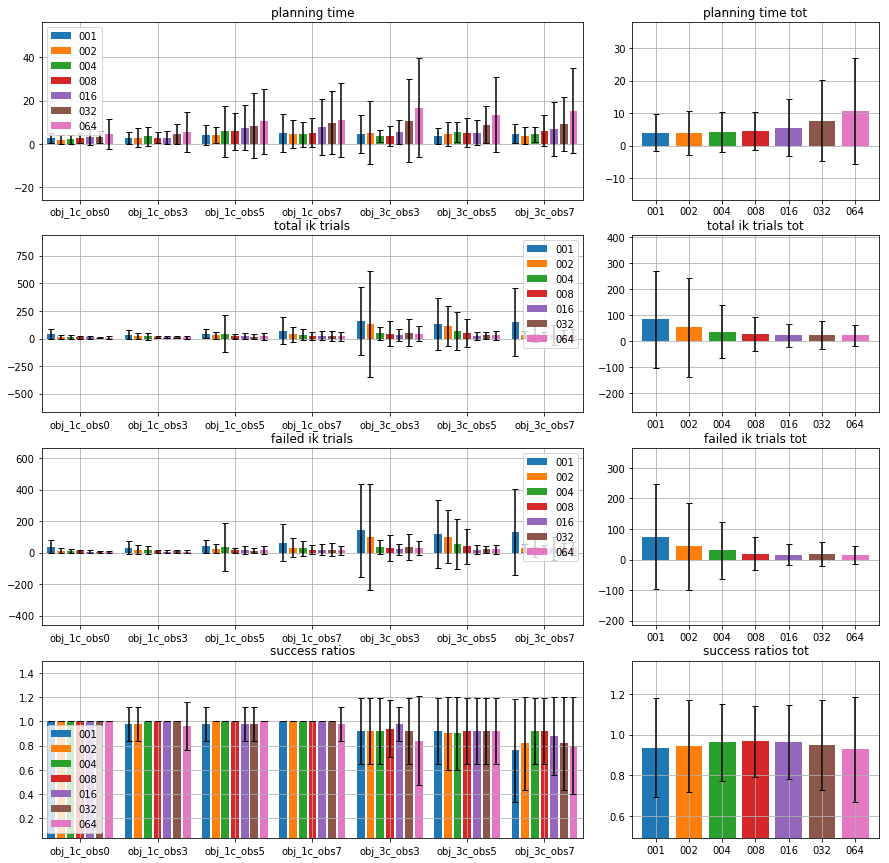

In [11]:
plt.figure(figsize=(15,15))

plt.subplot(4,3,(1, 2))
_ = plot_valid(resdat_all_accum, keys=["plan_time"], CHECKERS=CHECKERS)
plt.title("planning time")
plt.subplot(4,3,3)
time_dict = plot_valid(resdat_all_accum, keys=["plan_time"], CHECKERS=CHECKERS, average_all=True)
plt.title("planning time tot")

plt.subplot(4,3,(4, 5))
_ = plot_valid(resdat_all_accum, keys=["IK_tot"], CHECKERS=CHECKERS)
plt.title("total ik trials")
plt.subplot(4,3,6)
_ = plot_valid(resdat_all_accum, keys=["IK_tot"], CHECKERS=CHECKERS, average_all=True)
plt.title("total ik trials tot")

plt.subplot(4,3,(7, 8))
_ = plot_valid(resdat_all_accum, keys=["failed_IKs"], CHECKERS=CHECKERS)
plt.title("failed ik trials")
plt.subplot(4,3,9)
_ = plot_valid(resdat_all_accum, keys=["failed_IKs"], CHECKERS=CHECKERS, average_all=True)
plt.title("failed ik trials tot")

plt.subplot(4,3,(10, 11))
succ_dict = extract_values(resdat_all_accum, ["success"])
_ = grouped_bar(succ_dict)
plt.title("success ratios")
plt.subplot(4,3,12)
_ = grouped_bar(succ_dict, average_all=True)
plt.title("success ratios tot")

In [12]:
print("="*80)
success_vecs = [np.concatenate(map(lambda x: x["{:03}".format(ik_num)], succ_dict.values())) for ik_num in IK_NUMS]
success_means = map(np.mean, success_vecs)
max_val = np.max(success_means)
max_idc = np.where(success_means==max_val)[0]
print("IK_NUMS: ", "  ".join(map(lambda x:"{:5}".format(x), IK_NUMS)))
print("success: ", "  ".join(map(lambda x:"{:5.03}".format(x), success_means)))
print("best: {} ({:5.3})".format(np.array(IK_NUMS)[max_idc], max_val))
print("-"*80)
time_vecs = [np.concatenate(map(lambda x: x["{:03}".format(ik_num)], time_dict.values())) for ik_num in IK_NUMS]
time_means = np.array(map(np.mean, time_vecs))
min_val = np.min(time_means[max_idc])
min_idc = np.where(time_means[max_idc]==min_val)[0]
print("IK_NUMS: ", "  ".join(map(lambda x:"{:5}".format(x), IK_NUMS)))
print("times  : ", "  ".join(map(lambda x:"{:5.03}".format(x), time_means)))
print("best: {} ({:5.3})".format(np.array(IK_NUMS)[max_idc][min_idc], min_val))
print("="*80)

IK_NUMS:      1      2      4      8     16     32     64
success:  0.937  0.946  0.963  0.969  0.966  0.949  0.929
best: [8] (0.969)
--------------------------------------------------------------------------------
IK_NUMS:      1      2      4      8     16     32     64
times  :   3.94   3.93   4.26   4.54   5.57   7.71   10.6
best: [8] ( 4.54)


In [13]:
IK_NUM_BEST = np.array(IK_NUMS)[max_idc][min_idc[0]]
print("IK_NUM_BEST: {}".format(IK_NUM_BEST))

IK_NUM_BEST: 8


# MP analysis

In [14]:
IK_TRY_NUM = IK_NUM_BEST
MP_TIMES = [0.1,0.2,0.5,1.0,2.0,3.0,4.0,5.0,8.0]
RESULT_PATHS = []
MP_DIR_FORM = "stowing-deep-result-analysis-ik{:03}_mp{:.3}"
for mp_time in MP_TIMES:
    RES_ROOT = MP_DIR_FORM.format(IK_TRY_NUM, mp_time)
    TEST_RESULT_PATH = os.path.join(DATA_PATH, RES_ROOT)
    try_mkdir(TEST_RESULT_PATH)
    RESULT_PATHS.append(RES_ROOT)

## Common params

In [15]:
RTYPE = "panda"
DAT_DIR = '20210917-113211'
I_START = 0
I_END = 50


CNAME_LIST = ['None']
# CNAME_LIST = ['Full'] #,'Pairwise']
VISUALIZE = False
PLAY_RESULT = False
SHOW_STATE = False

TIMEOUT_MOTION = 5
MAX_TIME = 100
MAX_ITER = 100

GRASP_SAMPLE = 30
STABLE_SAMPLE = 50
SEARCH_SAMPLE_RATIO= 100
MAX_SKELETONS = 30
TIMED_COMPLETE = False
STACK_TIMELOG = True
IK_TRY_NUM = IK_TRY_NUM
VERBOSE = False
USE_MOVEIT_IK = True


common_args = [
            '--rtype', RTYPE,
            '--dat_root', DAT_ROOT,
            '--res_root', RES_ROOT,
            '--dat_dir', DAT_DIR,
            '--VISUALIZE', str(VISUALIZE),
            '--PLAY_RESULT', str(PLAY_RESULT),
            '--TIMEOUT_MOTION', str(TIMEOUT_MOTION),
            '--MAX_TIME', str(MAX_TIME),
            '--MAX_ITER', str(MAX_ITER), 
            '--GRASP_SAMPLE', str(GRASP_SAMPLE),
            '--STABLE_SAMPLE', str(STABLE_SAMPLE),
            '--SEARCH_SAMPLE_RATIO', str(SEARCH_SAMPLE_RATIO),
            '--MAX_SKELETONS', str(MAX_SKELETONS),
            '--TIMED_COMPLETE', str(TIMED_COMPLETE),
            '--STACK_TIMELOG', str(STACK_TIMELOG),
            '--IK_TRY_NUM', str(IK_TRY_NUM),
            '--VERBOSE', str(VERBOSE),
            '--USE_MOVEIT_IK', str(USE_MOVEIT_IK)]

# test loop

In [16]:
for mp_time, res_path in zip(MP_TIMES, RESULT_PATHS):
    common_args[common_args.index("--res_root")+1] = res_path
    common_args[common_args.index("--TIMEOUT_MOTION")+1] = str(mp_time)
    FILE_OPTION = "obj_1c_obs0"
    run_test_loop(FILE_OPTION, I_START, I_END, common_args, CNAME_LIST=CNAME_LIST)

    FILE_OPTION = "obj_1c_obs3"
    run_test_loop(FILE_OPTION, I_START, I_END, common_args, CNAME_LIST=CNAME_LIST)

    FILE_OPTION = "obj_1c_obs5"
    run_test_loop(FILE_OPTION, I_START, I_END, common_args, CNAME_LIST=CNAME_LIST)

    FILE_OPTION = "obj_1c_obs7"
    run_test_loop(FILE_OPTION, I_START, I_END, common_args, CNAME_LIST=CNAME_LIST)

    FILE_OPTION = "obj_3c_obs3"
    run_test_loop(FILE_OPTION, I_START, I_END, common_args, CNAME_LIST=CNAME_LIST)

    FILE_OPTION = "obj_3c_obs5"
    run_test_loop(FILE_OPTION, I_START, I_END, common_args, CNAME_LIST=CNAME_LIST)

    FILE_OPTION = "obj_3c_obs7"
    run_test_loop(FILE_OPTION, I_START, I_END, common_args, CNAME_LIST=CNAME_LIST)

------- 11.2    -------
========== 1 / 50 (eta: 11.2 / 560.6 s) =========
------- 6.8     -------
========== 2 / 50 (eta: 18.1 / 451.5 s) =========
------- 6.8     -------
========== 3 / 50 (eta: 24.9 / 415.0 s) =========
------- 6.2     -------
========== 4 / 50 (eta: 31.1 / 389.3 s) =========
------- 7.6     -------
========== 5 / 50 (eta: 38.8 / 387.7 s) =========
------- 7.6     -------
========== 6 / 50 (eta: 46.4 / 386.7 s) =========
------- 5.7     -------
========== 7 / 50 (eta: 52.1 / 372.4 s) =========
------- 9.2     -------
========== 8 / 50 (eta: 61.3 / 383.4 s) =========
------- 6.2     -------
========== 9 / 50 (eta: 67.6 / 375.3 s) =========
------- 11.5    -------
========== 10 / 50 (eta: 79.1 / 395.3 s) =========
------- 9.0     -------
========== 11 / 50 (eta: 88.1 / 400.4 s) =========
------- 5.7     -------
========== 12 / 50 (eta: 93.8 / 390.8 s) =========
------- 7.2     -------
========== 13 / 50 (eta: 101.0 / 388.6 s) =========
------- 12.3    -------
=========

KeyboardInterrupt: 

## plot results

In [ ]:
from plot_scripts import *

In [ ]:
try:
    resdat_all_accum = defaultdict(dict)
    CHECKERS = []
    for mp_time in MP_TIMES:
        resdat_all, res_dict_all = print_results(RES_ROOT=
                                                 MP_DIR_FORM.format(IK_TRY_NUM, mp_time), 
                                                 RTYPE="panda", 
                                                 DAT_DIR='20210917-113211',
                                                 CNAMES_EXCLUDE=[], read_only=False
                                                )
        cname_cur = "{:03}".format(mp_time)
        CHECKERS.append(cname_cur)
        for key in resdat_all.keys():
            resdat_all_accum[key][cname_cur]=resdat_all[key]["None"]
except Exception as e:
    TextColors.RED.println("ERROR: "+str(e))
    TextColors.RED.println('If you have not run the test script on this computer yet, please run "test loop" section below')

In [ ]:
plt.figure(figsize=(15,15))

plt.subplot(4,3,(1, 2))
_ = plot_valid(resdat_all_accum, keys=["plan_time"], CHECKERS=CHECKERS)
plt.title("planning time")
plt.subplot(4,3,3)
time_dict = plot_valid(resdat_all_accum, keys=["plan_time"], CHECKERS=CHECKERS, average_all=True)
plt.title("planning time tot")

plt.subplot(4,3,(4, 5))
_ = plot_valid(resdat_all_accum, keys=["MP_tot"], CHECKERS=CHECKERS)
plt.title("total mp trials")
plt.subplot(4,3,6)
_ = plot_valid(resdat_all_accum, keys=["MP_tot"], CHECKERS=CHECKERS, average_all=True)
plt.title("total mp trials tot")

plt.subplot(4,3,(7, 8))
_ = plot_valid(resdat_all_accum, keys=["failed_MPs"], CHECKERS=CHECKERS)
plt.title("failed mp trials")
plt.subplot(4,3,9)
_ = plot_valid(resdat_all_accum, keys=["failed_MPs"], CHECKERS=CHECKERS, average_all=True)
plt.title("failed mp trials tot")

plt.subplot(4,3,(10, 11))
succ_dict = extract_values(resdat_all_accum, ["success"])
_ = grouped_bar(succ_dict)
plt.title("success ratios")
plt.subplot(4,3,12)
_ = grouped_bar(succ_dict, average_all=True)
plt.title("success ratios tot")

In [ ]:
print("="*80)
success_vecs = [np.concatenate(map(lambda x: x["{:03}".format(mp_num)], succ_dict.values())) for mp_num in MP_TIMES]
success_means = map(np.mean, success_vecs)
max_val = np.max(success_means)
max_idc = np.where(success_means==max_val)[0]
print("MP_TIMES: ", "  ".join(map(lambda x:"{:5}".format(x), MP_TIMES)))
print("success: ", "  ".join(map(lambda x:"{:5.03}".format(x), success_means)))
print("best: {} ({:5.3})".format(np.array(MP_TIMES)[max_idc], max_val))
print("-"*80)
time_vecs = [np.concatenate(map(lambda x: x["{:03}".format(mp_num)], time_dict.values())) for mp_num in MP_TIMES]
time_means = np.array(map(np.mean, time_vecs))
min_val = np.min(time_means[max_idc])
min_idc = np.where(time_means[max_idc]==min_val)[0]
print("MP_TIMES: ", "  ".join(map(lambda x:"{:5}".format(x), MP_TIMES)))
print("times  : ", "  ".join(map(lambda x:"{:5.03}".format(x), time_means)))
print("best: {} ({:5.3})".format(np.array(MP_TIMES)[max_idc][min_idc], min_val))
print("="*80)